## Logoistic Regression and sklearn.linear_model.LogisticRegression

**Linear Regression: $\hat{y} = x * w + b$**   
**Training loss(MSE Mean Squared Error): $loss = (\hat{y} - y)^2 = (x * w -y)^2$**

**Logistic Funtion: $σ(x) = \frac{1}{1+e^{-x}}$**  
**Logistic Regression：$\hat{y} = σ(x * w + b)$**   
**Training loss(BCE Binary Cross Entropy): $loss = -(ylog\hat{y} + (1-y)log(1-\hat{y}))$**




class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

#### **For building and hyperparameter tuning an logistic regression classifier, we need to know at least three parameters:**  
**penalty:**{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
Specify the norm of the penalty:
* 'none': no penalty is added;
* 'l2': add a L2 penalty term and it is the default choice;
* 'l1': add a L1 penalty term;
* 'elasticnet': both L1 and L2 penalty terms are added.

---

**C:** float, default=1.0  
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

---

**solver:** {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’  
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
* For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
* For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
* ‘liblinear’ is limited to one-versus-rest schemes.

## Multi-class Classification Demo

Import libraries

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

Load dataset

Iris Dataset, a common used machine learning Dataset, provide by UCI: https://archive.ics.uci.edu/ml/datasets/iris

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 

**Number of Instances:** 150

**Attribute Information:**

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:  Iris Setosa; Iris Versicolour; Iris Virginica

In [8]:
iris = datasets.load_iris()

In [9]:
X = iris.data[:,:2]
y = iris.target

In [10]:
print(X.shape)
print(y.shape)

(150, 2)
(150,)


Normalization

In [12]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

In [ ]:
X_train_scaled == X

Data visualization

In [15]:
class0 = X[np.where(y == 0)]
class1 = X[np.where(y == 1)]
class2 = X[np.where(y == 2)]

Text(0, 0.5, 'sepal width')

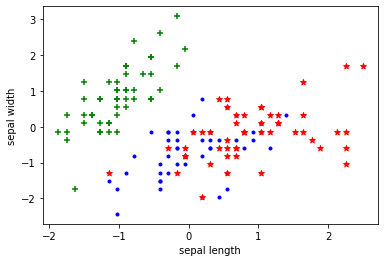

In [16]:
plt.scatter(class0[:,0], class0[:,1], color='green', marker="+")
plt.scatter(class1[:,0], class1[:,1], color='blue', marker='.')
plt.scatter(class2[:,0], class2[:,1], color='red', marker='*')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Split data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Build Logistic Regression Classifier

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
LR_clf = LogisticRegression()

Trian the model

In [21]:
LR_clf.fit(X_train, y_train)

LogisticRegression()

Test the model

In [22]:
LR_clf.score(X_test, y_test)

0.8666666666666667

Decision Boundary visualization

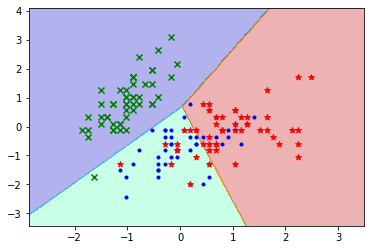

In [23]:
x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
h = 0.02
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
z = LR_clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.jet, alpha=0.3)
plt.scatter(X[np.where(y == 0)[0], 0], X[np.where(y == 0)[0], 1], color='green', marker="x")
plt.scatter(X[np.where(y == 1)[0], 0], X[np.where(y == 1)[0], 1], color='blue', marker='.')
plt.scatter(X[np.where(y == 2)[0], 0], X[np.where(y == 2)[0], 1], color='red', marker='*')
plt.show()